**Titanic Survival Prediction**

The Titanic was a British passenger liner that sank on its maiden voyage crossing the atlantic from Southampton on its way to New York. 

The titanic dataset is a popular dataset used for creating machine learning models. Although the data is ancient in data science terms, its accuracy, completeness and an already determined outcome makes it especially useful in both learning and practising on machine learning models.

In this exercise, we will use the dataset in trying to predict whether a passenger was likely to survive based on characteristics such as the class in which they were travelling, their age and whether or not they were travelling alone or with other family members.

The dataset comprises of the following columns(Column Descriptions from Kaggle)

Survival	0 = No, 1 = Yes

Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
Sex	
Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
Ticket number	
Passenger fare	
Cabin number	
Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Research Question**

Predicting whether a passenger survived or not

**Metric of Success**

A KNN model that predicts whether a passenger survived with an accuracy score of more than 80%

**Research Approach**

A KNN Model

LDA

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor

In [2]:
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Exploration**

In [4]:
train.shape

(891, 12)

Our train dataset is made up of 891 rows and 12 columns

In [5]:
# Checking the data types of our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset is a mix of float, objects and intergers. For the analysis to work encoding needs to be perfomed on the sex and embarked columns.

In [6]:
# Checking for null values in the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The "Cabin" column has 687 out 891 null values, there is too much missing data in this column and therefore will be dropped for the analysis. Other ways of dealing with nulls will be used to deal with the null values in the "Age" and "Emabrked" columns.

In [7]:
# Checking for null values in the train dataset
train.duplicated().sum()

0

The dataset does not contain any duplicated values.

**Tidying the Dataset**

In [8]:
train =  train.drop('Cabin', axis = 1)

There are too many null values in the cabin column, dropping it seems to be the best way to deal with it.

In [9]:
train['Age'] = train['Age'].ffill()

The "Age" column has 177 null values. The column however looks important for the analysis and dropping the nulls in it may lead to too much loss of data and dropping the column in totality will result in missing a factor that may be important for the analysis, therefore, forward filling has been used to deal with the null values in it.

In [10]:
train = train.dropna(subset=['Embarked'])

There are only 2 null values in the embarked column, dropping them will not result in loss of too much data. 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
# Dropping columns that aren't necessary for our analysis
train =  train.drop(['PassengerId','Ticket','Name'], axis = 1)

**Exploratory Data Analysis(EDA)**

In [13]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.535624,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.527483,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean age for the passengers in the titanic was 29.53 years, with the youngest passenger being less than 1 year and the oldest being 80 years. The mean fare paid was 32, with the highest amount paid being 512.33

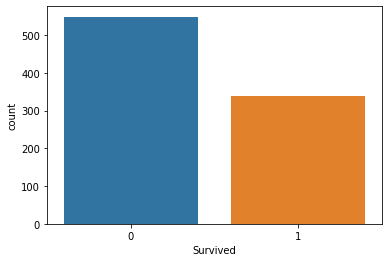

In [14]:
# A countplot to show how many passengers survived 
sns.countplot(train['Survived'])

There were more casualties than survivers in the titanic 

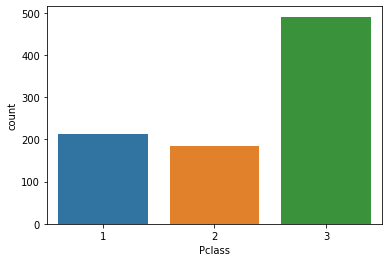

In [15]:
# Checking passenger distribution across the three passenger classes
sns.countplot(train['Pclass'])

The third class had the highest number of passengers followed by the first and finally the second class 

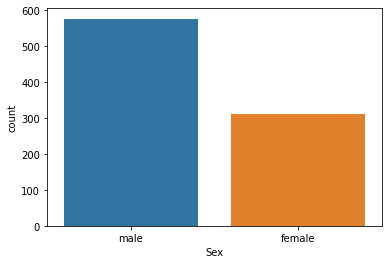

In [16]:
# Checking passenger split between the two genders
sns.countplot(train['Sex'])

There were more male than female passengers on the titanic

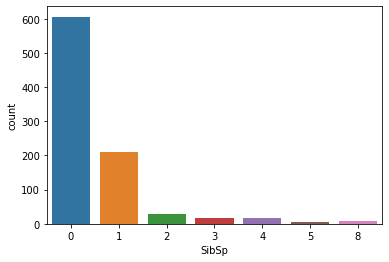

In [17]:
# Checking passenger split between the two genders
sns.countplot(train['SibSp'])

Most of the passengers - around 600, had no siblings on board. Those with 1 sibling on board were second with around 200 passengers

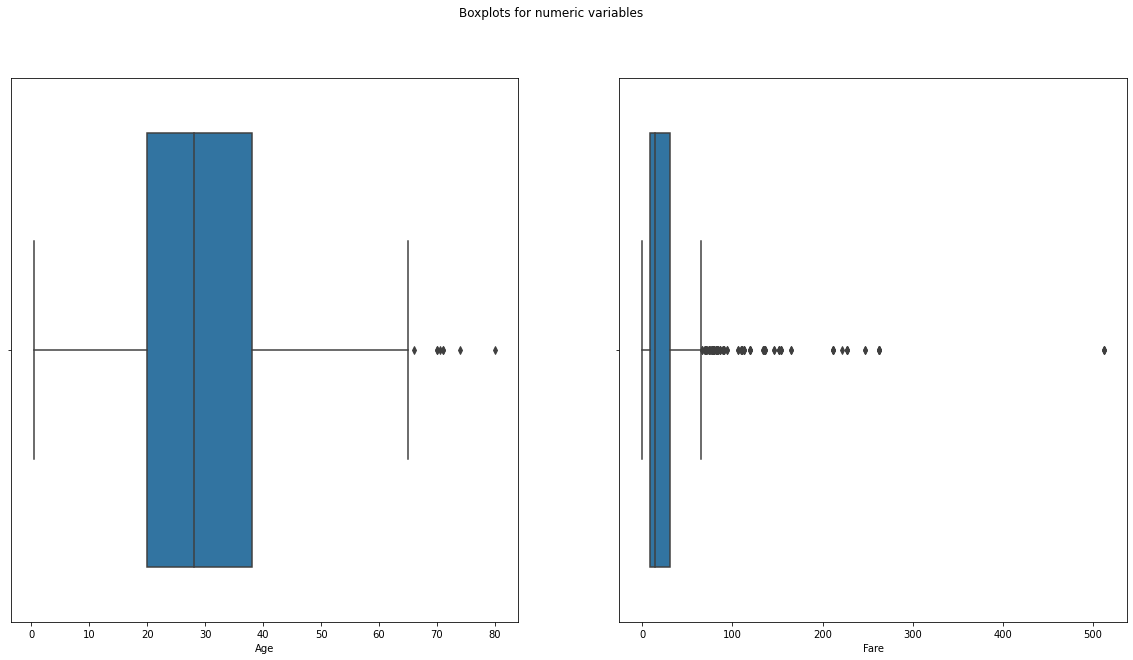

In [18]:
# Checking for outliers on numeric variables
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(train['Age'], ax=ax1)
sns.boxplot(train['Fare'], ax=ax2)
plt.show()

The outliers observed in the age column are expected for a dataset recording the age of human beings. A google search on the prices also indicates that the outliers are a true reflection of the actual prices charged on the titanic.

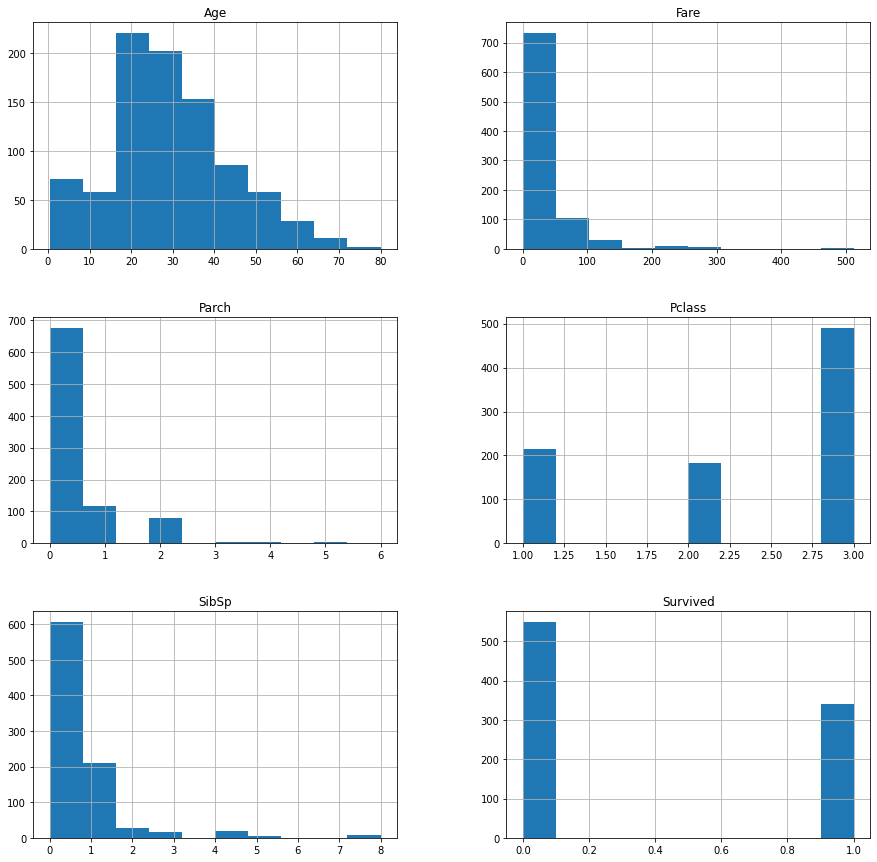

In [19]:

train.hist(bins=10, figsize=(15,15))
plt.show()

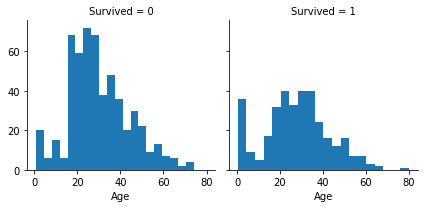

In [20]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

The above plot indicates that the passangers aged between 20 and 40 were more likely to perish in the accident while the youngest and were more likely to survive.

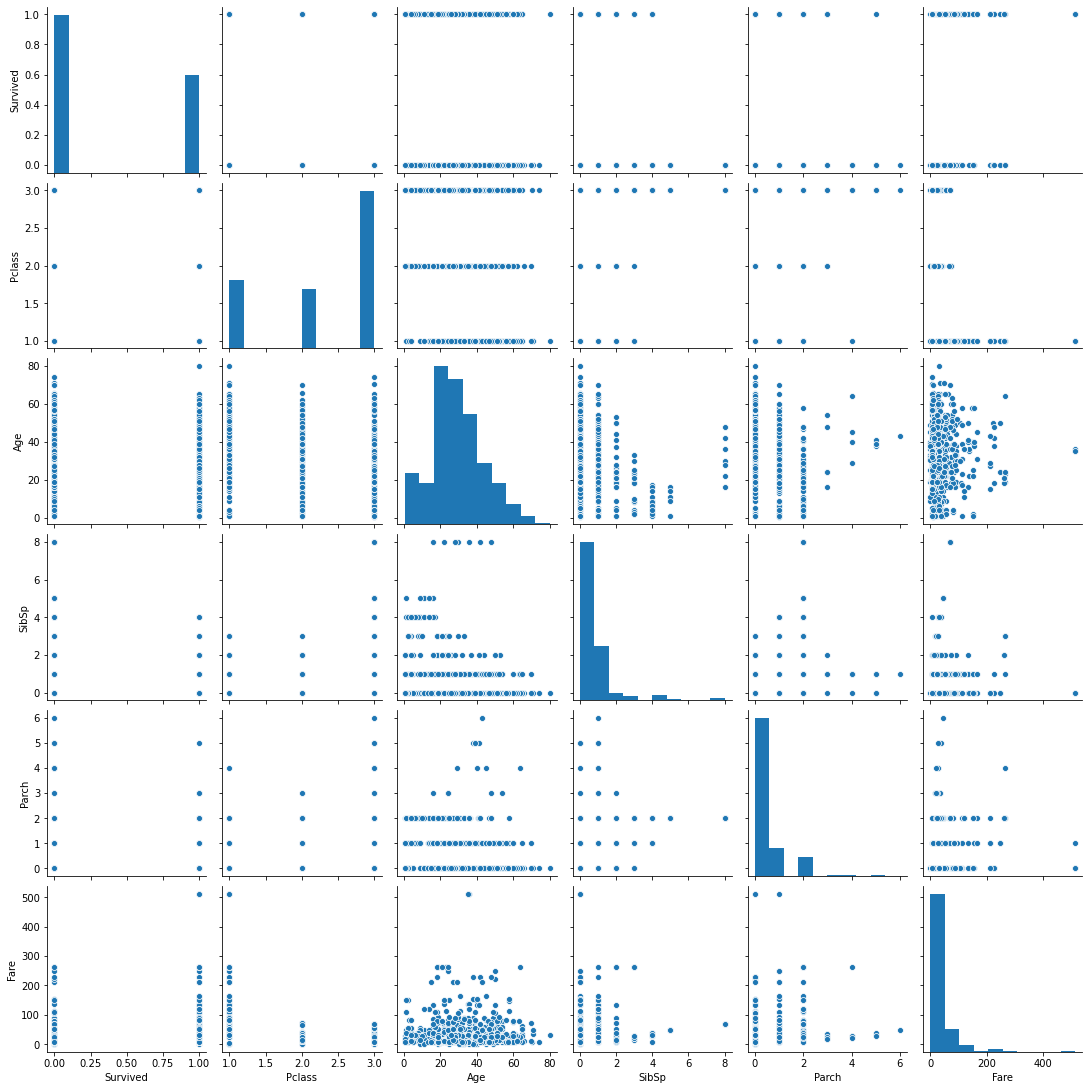

In [21]:
sns.pairplot(train) 
plt.show()

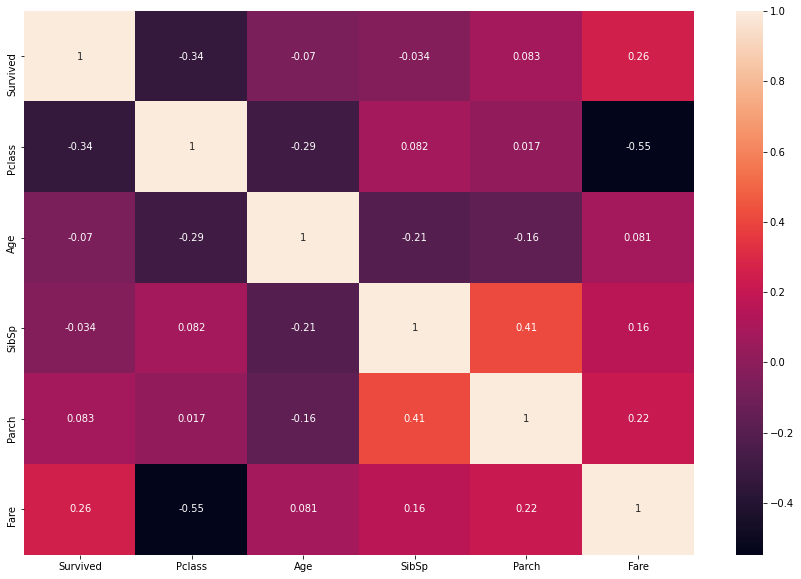

In [22]:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, ax=ax);

The passenger class and the fare are highly correlates, this is to be expected as the fare paid also indicates the class that the passenger is expected to travel on

**Creating the Model**

**Creating our baseline KNN model**

In [27]:
train = train.apply(LabelEncoder().fit_transform)

In [42]:
# Split the independent and dependent variables
# We want to predict if someone survived or not
X = train.drop(['Survived'], axis=1)

y = train['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  16]
 [ 21  39]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       118
           1       0.71      0.65      0.68        60

    accuracy                           0.79       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.79      0.79      0.79       178



In [52]:
metrics.accuracy_score(y_test, y_pred)

0.7921348314606742

Our model has an accuracy of 79.21%. This being our baseline model, we will try and improve the accuracy using LDA and see whether the model's accuracy improves.

**Model Improvements**

In [55]:
X = train.drop(['Survived'], axis=1)

y = train['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [58]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
y_pred = classifier.predict(X_test)

In [60]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  19]
 [ 24  35]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       119
           1       0.65      0.59      0.62        59

    accuracy                           0.76       178
   macro avg       0.73      0.72      0.72       178
weighted avg       0.75      0.76      0.76       178



In [61]:
metrics.accuracy_score(y_test, y_pred)

0.7584269662921348

Using LDA seems to have reduced the model accuracy from 79.21% to 75.84%

Changing the value of K to see if this improves our model accuracy

In [62]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.8089887640449438

Increasing the value of our K improves the accuracy of our model to 80.90%

**Challenging Our Model**

Using random forest to challenge our model

In [69]:
X = train.drop(['Survived'], axis=1)

y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tree = DecisionTreeClassifier()

tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7415730337078652


Using a single decision tree does not improve the accuracy of our model, the best model, therefore, is the KNN model with K as 15